In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_diabetes
diab = load_diabetes()
columns = diab.feature_names

In [4]:
print(diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [7]:
X = pd.DataFrame(diab.data, columns = diab.feature_names)
y = diab.target

In [11]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-3.634285e-16,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.308343e-16,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-8.045349e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,1.281655e-16,0.047619,-0.112400,-0.036656,-0.005671,0.035644,0.132044
s1,442.0,-8.835316e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,1.327024e-16,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-4.574646e-16,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,3.777301e-16,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,-3.830854e-16,0.047619,-0.126097,-0.033249,-0.001948,0.032433,0.133599
s6,442.0,-3.412882e-16,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept = True)

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [17]:
from sklearn.metrics import r2_score, mean_squared_error

In [18]:
print('R-squared of Train Data:', r2_score(y_train, y_pred_train))
print('RMSE of Train Data:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

R-squared of Train Data: 0.5417930755782383
RMSE of Train Data: 53.74039780349305


In [19]:
print('R-squared of Test Data:', r2_score(y_test, y_pred_test))
print('RMSE of Test Data:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

R-squared of Test Data: 0.43845698491295737
RMSE of Test Data: 53.17020745339258


The model performance is low on both train & test datasets. It seems the model is underfiting. 

The poor performance is may be because underlying relationships may not be linear and the model is not capturing interaction effects.

In order to incorporate non-linearity and inetraction effect we will apply polynomial features. 

## Applying polynomial Featuers

In [20]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures()

xt = pf.fit_transform(X)

cols = pf.get_feature_names(X.columns)

xt = pd.DataFrame(xt, columns = cols)

In [24]:
xt.head().T

,0,1,2,3,4
1,1.000000,1.000000,1.000000,1.000000,1.000000
age,0.038076,-0.001882,0.085299,-0.089063,0.005383
sex,0.050680,-0.044642,0.050680,-0.044642,-0.044642
bmi,0.061696,-0.051474,0.044451,-0.011595,-0.036385
bp,0.021872,-0.026328,-0.005671,-0.036656,0.021872
...,...,...,...,...,...
s4 s5,-0.000052,0.002699,-0.000007,0.000779,0.000083
s4 s6,0.000046,0.003641,0.000067,-0.000321,0.000121
s5^2,0.000396,0.004669,0.000008,0.000515,0.001023
s5 s6,-0.000351,0.006300,-0.000074,-0.000212,0.001492


In [25]:
X_train, X_test, y_train, y_test = train_test_split(xt, y, test_size = 0.3, random_state = 1)

from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept = False)

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print('R-squared of Train Data:', r2_score(y_train, y_pred_train))
print('RMSE of Train Data:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

print('R-squared of Test Data:', r2_score(y_test, y_pred_test))
print('RMSE of Test Data:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

R-squared of Train Data: 0.6378217220050759
RMSE of Train Data: 47.77836156551898
R-squared of Test Data: 0.21179856096557015
RMSE of Test Data: 62.99345833822051


## Now Lets apply Recursive Feature Elimination

In [26]:
from sklearn.feature_selection import RFE

In [30]:
xt

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,...,s3^2,s3 s4,s3 s5,s3 s6,s4^2,s4 s5,s4 s6,s5^2,s5 s6,s6^2
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,...,0.001884,0.000113,-0.000864,0.000766,0.000007,-0.000052,0.000046,0.000396,-0.000351,0.000311
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,...,0.005537,-0.002939,-0.005085,-0.006861,0.001560,0.002699,0.003641,0.004669,0.006300,0.008502
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,...,0.001047,0.000084,-0.000093,0.000839,0.000007,-0.000007,0.000067,0.000008,-0.000074,0.000672
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,...,0.001299,-0.001236,-0.000818,0.000337,0.001177,0.000779,-0.000321,0.000515,-0.000212,0.000088
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,...,0.000066,-0.000021,-0.000260,-0.000380,0.000007,0.000083,0.000121,0.001023,0.001492,0.002175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,...,0.000822,0.000074,-0.000894,-0.000207,0.000007,-0.000081,-0.000019,0.000973,0.000225,0.000052
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,...,0.000822,-0.000984,0.000520,-0.001276,0.001177,-0.000622,0.001526,0.000328,-0.000806,0.001979
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,...,0.000625,0.000277,0.001172,-0.000387,0.000123,0.000519,-0.000172,0.002198,-0.000726,0.000240
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,...,0.000822,-0.000762,-0.001277,0.000744,0.000705,0.001183,-0.000689,0.001983,-0.001155,0.000672


In [46]:
lr = LinearRegression(fit_intercept = True)
rfe = RFE(lr, n_features_to_select = 2)

rfe.fit(xt, y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=2, step=1, verbose=0)

In [47]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [48]:
rfe.ranking_

array([63, 59, 50, 56,  5,  6,  7, 62,  4, 61, 54, 34, 58, 49, 40, 14, 15,
       13, 41, 44, 64, 46, 42,  8,  9, 24, 51, 23, 55, 53, 16, 10, 11, 35,
       52, 12, 57, 60, 21, 19, 22, 18, 20, 45, 33, 25, 27, 28,  1, 39, 26,
       43, 31,  1, 38, 32, 30,  3, 37, 29, 17, 36,  2, 48, 47])

In [49]:
pd.DataFrame(rfe.ranking_, index = xt.columns)

,0
age,63
sex,59
bmi,50
bp,56
s1,5
...,...
s4 s5,17
s4 s6,36
s5^2,2
s5 s6,48


In [50]:
rf = pd.DataFrame(rfe.ranking_, columns = ['selected'], index = xt.columns)
rf.sort_values(by=['selected'])

,selected
s1 s5,1
s2 s5,1
s5^2,2
s3 s5,3
s5,4
...,...
bp^2,60
s6,61
s4,62
age,63


## Identifying the optimal no of variables to keep in the model (simulation approach)

In [71]:
no_cols = xt.shape[1]

r2_train_score = []
r2_test_score = []
mvars = []

X_train, X_test, y_train, y_test = train_test_split(xt, y, test_size = 0.3, random_state = 1)

for n in range(no_cols):
    lr = LinearRegression()
    rfe = RFE(lr, n+1)
    rfe.fit(X_train, y_train)
    mvars.append(n+1)
    
    y_pred_train = rfe.predict(X_train)
    y_pred_test = rfe.predict(X_test)
    
    r2_train = r2_score(y_train, y_pred_train)
    r2_train_score.append(r2_train)
    
    r2_test = r2_score(y_test, y_pred_test)
    r2_test_score.append(r2_test)
    

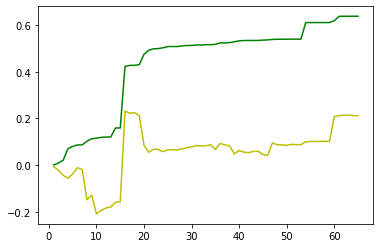

In [72]:
plt.plot(mvars,r2_train_score, color = 'g')
plt.plot(mvars,r2_test_score, color = 'y')
plt.show()

The chart shows that we get best performance when number of variables are 16.(We get the best performance on the test set when no of variables are 16)

In [74]:
test_result = pd.DataFrame({'mvars': mvars, 'r2_test': r2_test_score})
test_result.sort_values(by = ['r2_test'], ascending = False)

,mvars,r2_test
15,16,0.231282
17,18,0.224331
16,17,0.222034
62,63,0.213984
61,62,0.213853
...,...,...
13,14,-0.159131
12,13,-0.180020
11,12,-0.184066
10,11,-0.194426


In [81]:
lr = LinearRegression(fit_intercept = True)
rfe = RFE(lr, n_features_to_select = 16)

rfe.fit(X_train, y_train)

y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print('R-squared of Train Data:', r2_score(y_train, y_pred_train))
print('RMSE of Train Data:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

print('R-squared of Test Data:', r2_score(y_test, y_pred_test))
print('RMSE of Test Data:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

R-squared of Train Data: 0.42215931219386404
RMSE of Train Data: 60.34956059005804
R-squared of Test Data: 0.2312821417751475
RMSE of Test Data: 62.210017744465496


In [82]:
rfe.support_

array([False, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False,  True, False,  True,
        True,  True, False,  True, False,  True,  True, False,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False])

In [83]:
rfe.ranking_

array([49, 46, 39, 45,  1,  1,  1, 48,  2, 47, 38, 21, 36, 44, 13, 19, 11,
       12, 20, 24, 50, 31, 42, 15, 16, 17, 41, 18, 30, 32,  5, 22, 35,  6,
       10, 26, 33, 25,  1,  1,  1, 14,  1, 40,  1,  1,  1,  3,  1,  9,  1,
        1,  4,  1, 27,  1, 29,  1,  8, 23, 34,  7, 43, 28, 37])

In [84]:
pd.DataFrame(rfe.ranking_, index = xt.columns)

,0
age,49
sex,46
bmi,39
bp,45
s1,1
...,...
s4 s5,34
s4 s6,7
s5^2,43
s5 s6,28


In [85]:
rf = pd.DataFrame(rfe.ranking_, columns = ['selected'], index = xt.columns)
rf.sort_values(by=['selected'])

,selected
s2^2,1
bp s1,1
s2 s5,1
bp s2,1
bp s3,1
...,...
sex,46
s6,47
s4,48
age,49


In [86]:
rf[(rf['selected'] == 1)]

,selected
s1,1
s2,1
s3,1
bp s1,1
bp s2,1
bp s3,1
bp s5,1
s1^2,1
s1 s2,1
s1 s3,1


## Cross Validations

In [94]:
dd = np.arange(100)

from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)

for d1, d2 in kf.split(dd):
    print(d1, d2)

[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99] [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99] [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25

In [96]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold

In [105]:
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=10)

print(scores)
print(scores.mean())

[0.55614411 0.23056092 0.35357777 0.62190498 0.26587602 0.61819338
 0.41815916 0.43515232 0.43436983 0.68568514]
0.4619623619583371
